In [22]:
## Wyświetlenie danych wejściowych

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [24]:
# Zadanie 1
years = sorted(set(df['Year']))
result_dict = {year: 0 for year in years}

for index, row in df.iterrows():
    result_dict[row['Year']] += 1

result_1 = pd.DataFrame({"Year": result_dict.keys(), "number_of_athlete": result_dict.values()})
result_1

,Year,number_of_athlete
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


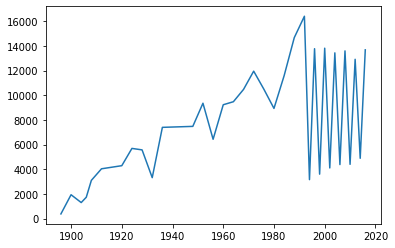

In [25]:
# plots 1 task_1
plt.plot(result_1['Year'], result_1['number_of_athlete'])

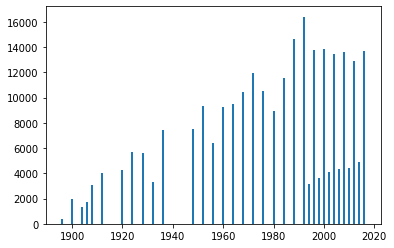

In [26]:
# plots 2 task_1
plt.bar(result_1['Year'], result_1['number_of_athlete'])
plt.show()

In [27]:
# Zadanie 2

# {kraj: [suma_mezczyzn: int, suma_kobiet: int, lata_w_ktorych_wystawili_zawodnikow: set]}
sum_of_people = {team: [0, 0, set()] for team in set(df['Team'])}
for index, row in df.iterrows():
    if row['Sex'] == 'M':
        sum_of_people[row['Team']][0] += 1
    else:
        sum_of_people[row['Team']][1] += 1
    sum_of_people[row['Team']][2].add(row['Year'])

_average_male = [sum_of_people[key][0] / len(sum_of_people[key][2]) for key in sum_of_people]
_average_female = [sum_of_people[key][1] / len(sum_of_people[key][2]) for key in sum_of_people]

result_2 = pd.DataFrame(
    {"Team": sum_of_people.keys(), "Average_male": _average_male, "Average_female": _average_female})
result_2

,Team,Average_male,Average_female
0,Belgium-2,3.125000,0.250000
1,Ingegerd,4.000000,0.000000
2,Cicely-1,1.000000,0.000000
3,East Germany-1,7.166667,0.833333
4,Almaz,2.000000,0.000000
...,...,...,...
1179,Galt Football Club,13.000000,0.000000
1180,Socit Nautique de la Basse Seine-1,8.000000,0.000000
1181,Fram III,3.000000,0.000000
1182,United States-5,2.000000,0.000000


<ErrorbarContainer object of 3 artists>

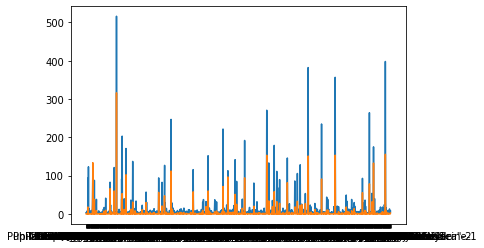

In [37]:
# plots 1 task_2

plt.errorbar(sum_of_people.keys(), _average_male, label='Average_male')
plt.errorbar(sum_of_people.keys(), _average_female, label='Average_female')

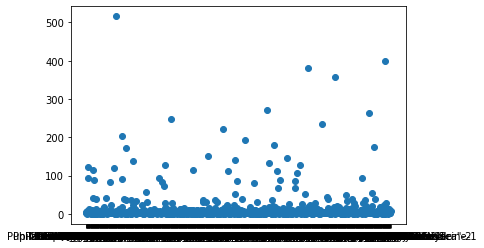

In [30]:
# plots 2 task_2
plt.scatter(sum_of_people.keys(), _average_male)

In [39]:
# Zadanie 3
# {kraj: [liczba_różnych_zawodników, zbiór_zawodników, zbiór_olimpiad]}
different_players = {team: [0, set(), set()] for team in set(df['Team'])}
for index, row in df.iterrows():
    if row['Name'] not in different_players[row['Team']][1]:
        different_players[row['Team']][0] += 1
        different_players[row['Team']][1].add(row['Name'])
    different_players[row['Team']][2].add(row['Games'])

top_5_different_team = sorted(different_players, key=different_players.get, reverse=True)[:5]

result_3 = pd.DataFrame({"Team": top_5_different_team, "numer of player / number of olympics": [
    different_players[country][0] / len(different_players[country][2]) for country in top_5_different_team]})
result_3

,Team,numer of player / number of olympics
0,United States,182.280000
1,France,113.274510
2,Great Britain,112.901961
3,Italy,91.921569
4,Germany,134.382353


([<matplotlib.patches.Wedge at 0x23d5f58fd00>,
 [Text(0.6819162692066831, 0.8631281491130032, 'United States'),
  Text(-0.784579265390614, 0.7709963529869158, 'France'),
  Text(-1.0360214622630264, -0.3696748973495233, 'Great Britain'),
  Text(-0.23396510351411437, -1.0748303728205812, 'Italy'),
  Text(0.8655455411427045, -0.6788452814949684, 'Germany')])

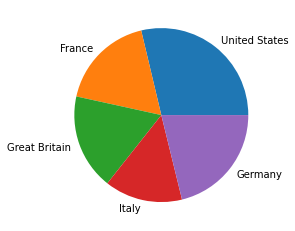

In [38]:
# plot 1 task_3
plt.pie([
    different_players[country][0] / len(different_players[country][2]) for country in top_5_different_team], labels=top_5_different_team)

Text(0, 0.5, 'number of player / number of olympics')

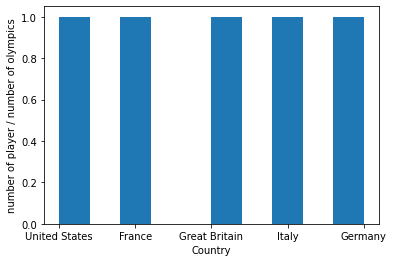

In [46]:
# plot 2 task_3
plt.hist(top_5_different_team)
plt.xlabel("Country")
plt.ylabel("number of player / number of olympics")
